<a href="https://colab.research.google.com/github/kazuekudo1222/telecom-churn-prediction/blob/main/Telecom_churn_data_clearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom**

## Overview of the data

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import missingno as msno
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

In [ ]:
# Connect colab with G-drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Change the work directory
os.chdir("/content/drive/MyDrive/Le Wagon/project/original") ## Put your work directry!
os.getcwd()

'/content/drive/MyDrive/Le Wagon/project/original'

In [ ]:
# Import the customer data
d = pd.read_csv("telecom_customer_churn.csv")
print(d.info())
d.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN


In [ ]:
# Import the zipcode data
z = pd.read_csv("telecom_zipcode_population.csv")
print(z.info())
z.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB
None


,Zip Code,Population
0,90001,54492
1,90002,44586


In [ ]:
### Change the name of columns to those without spaces for ease of use in terms of coding
## Customer table
d.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
# Replace spaces with _
d.columns = d.columns.str.replace(" ", "_")

# Convert to lowercase
d.columns = d.columns.str.lower()

# Check the name of columns
d.columns

Index(['customer_id', 'gender', 'age', 'married', 'number_of_dependents',
       'city', 'zip_code', 'latitude', 'longitude', 'number_of_referrals',
       'tenure_in_months', 'offer', 'phone_service',
       'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [ ]:
## Zipcode table
# Replace spaces with _
z.columns = z.columns.str.replace(" ", "_")

# Convert to lowercase
z.columns = z.columns.str.lower()

# Check the name of columns
z.columns

Index(['zip_code', 'population'], dtype='object')

## Missing values
### Conclusion: no need to handle any NAs.

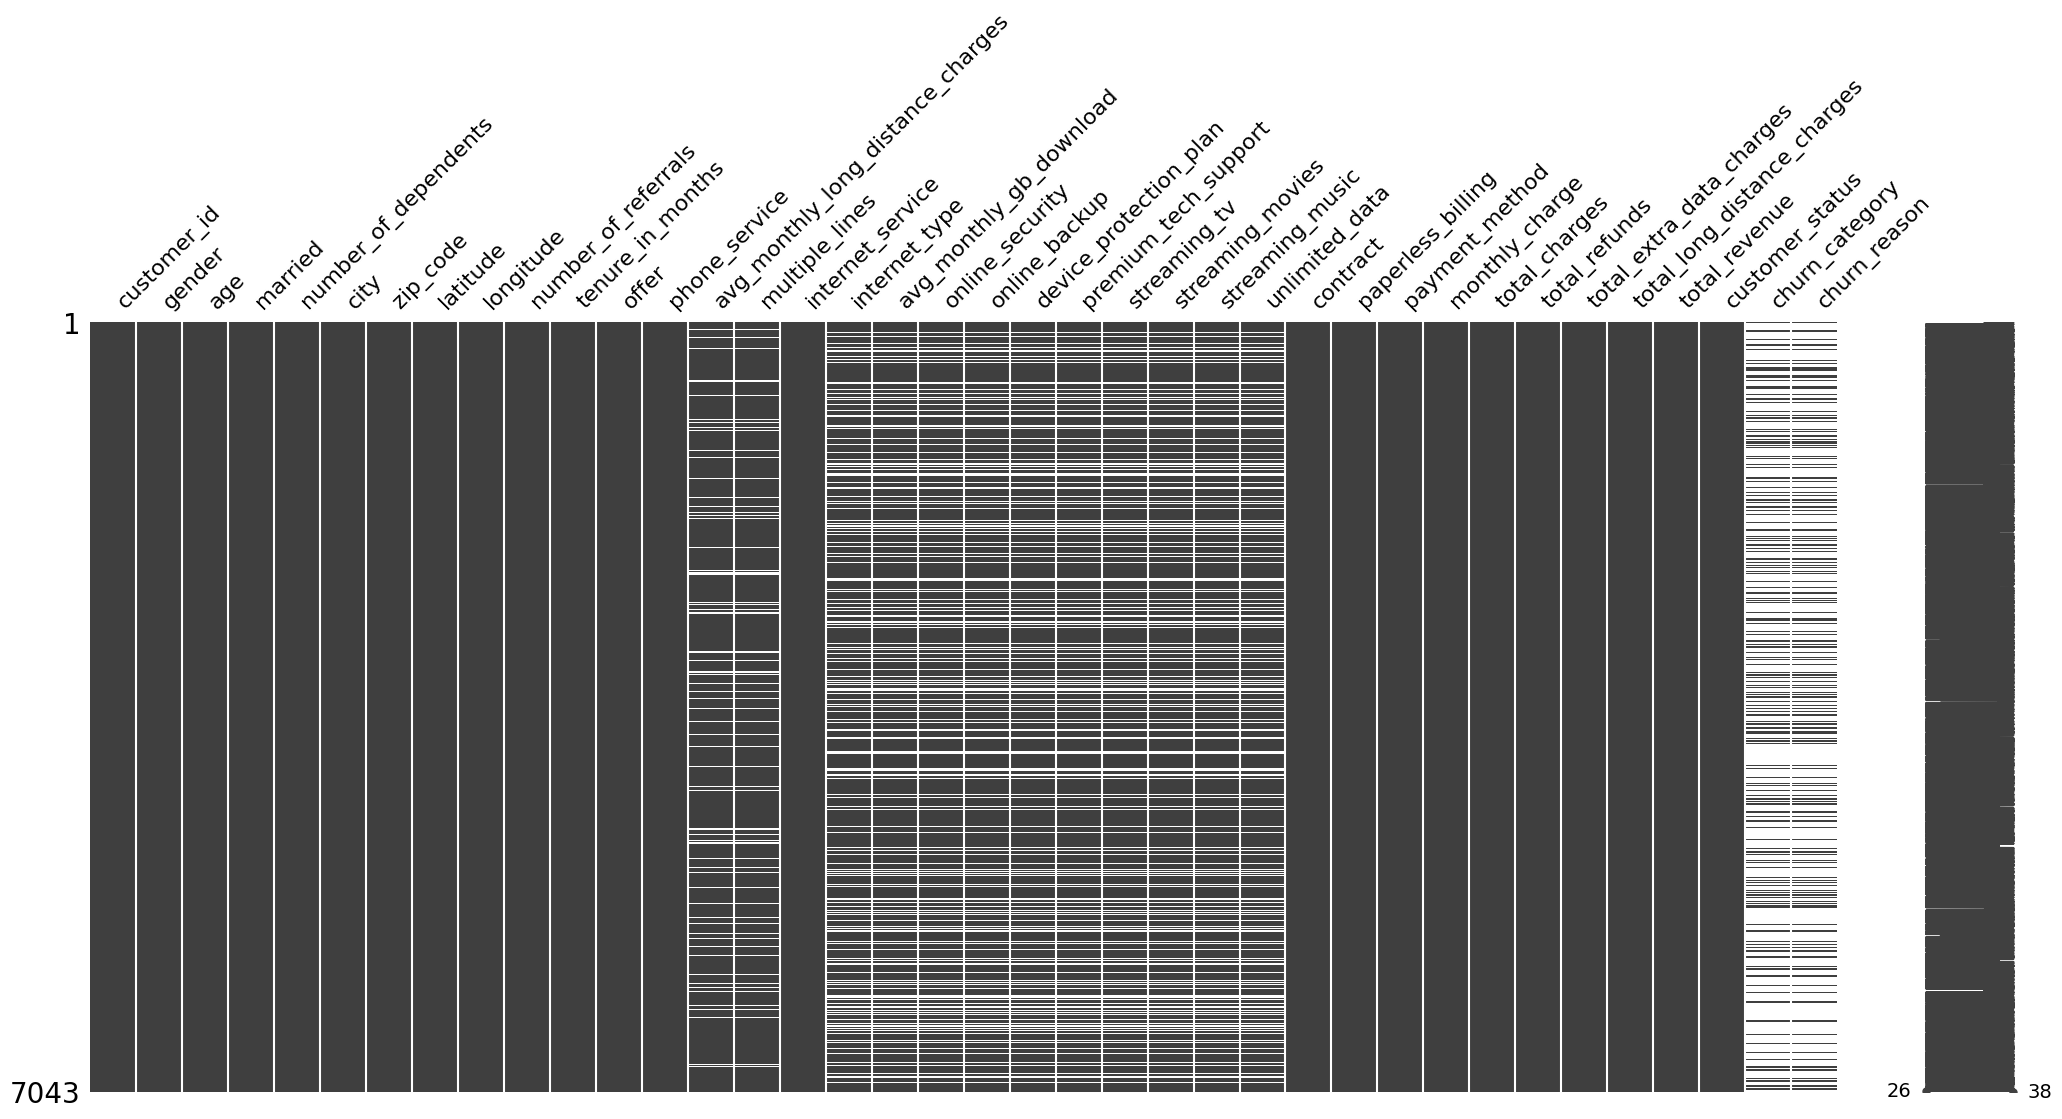

In [ ]:
# Check missing values
msno.matrix(d)
plt.show()

In [ ]:
########### Missing values for 12 variables:
#### 1) The following 2 variabvles: 10% is missing (682 (7043 all obs. - 6361 no NA obs.) / 7043);
#### As the next cells explains, these customers are not subscribing home-phone line service ("phone_service" = "No") but internet service ("internet_service" = "Yes"),
#### thats why NAs for "Avg Monthly Long Distance Charges" & "Multiple Lines" (phone related serivces).

#  13  Avg Monthly Long Distance Charges  6361 non-null   float64
#  14  Multiple Lines                     6361 non-null   object

## =>>> Next step: fill na with "No" for [multiple_lines] and 0 for [avg_monthly_long_distance_charges].


#### 2) The following 10 variables: 22% is missing (1526 (7043 all obs. - 5517 no NA obs.) / 7043);
#### These obs. only subscribe home-phone line not the internet.

#  16  Internet Type                      5517 non-null   object
#  17  Avg Monthly GB Download            5517 non-null   float64
#  18  Online Security                    5517 non-null   object
#  19  Online Backup                      5517 non-null   object
#  20  Device Protection Plan             5517 non-null   object
#  21  Premium Tech Support               5517 non-null   object
#  22  Streaming TV                       5517 non-null   object
#  23  Streaming Movies                   5517 non-null   object
#  24  Streaming Music                    5517 non-null   object
#  25  Unlimited Data                     5517 non-null   object

## =>>> Next step: fill na with 0 for [avg_monthly_gb_download] and "No" for other [9 variables].


#### 3) The following 2 variables:  74% is missing (5174 (7043 all obs. - 1869 no NA obs) / 7043)
#### These are missing as 5174 of the obs are not churner.

#  36  Churn Category                     1869 non-null   object : Missing values as staying and joining company do not churn. This variables has all 1869 churners data.
#  37  Churn Reason                       1869 non-null   object : the same with chrun category.

## =>>> Next step: fill na with "no_churn".

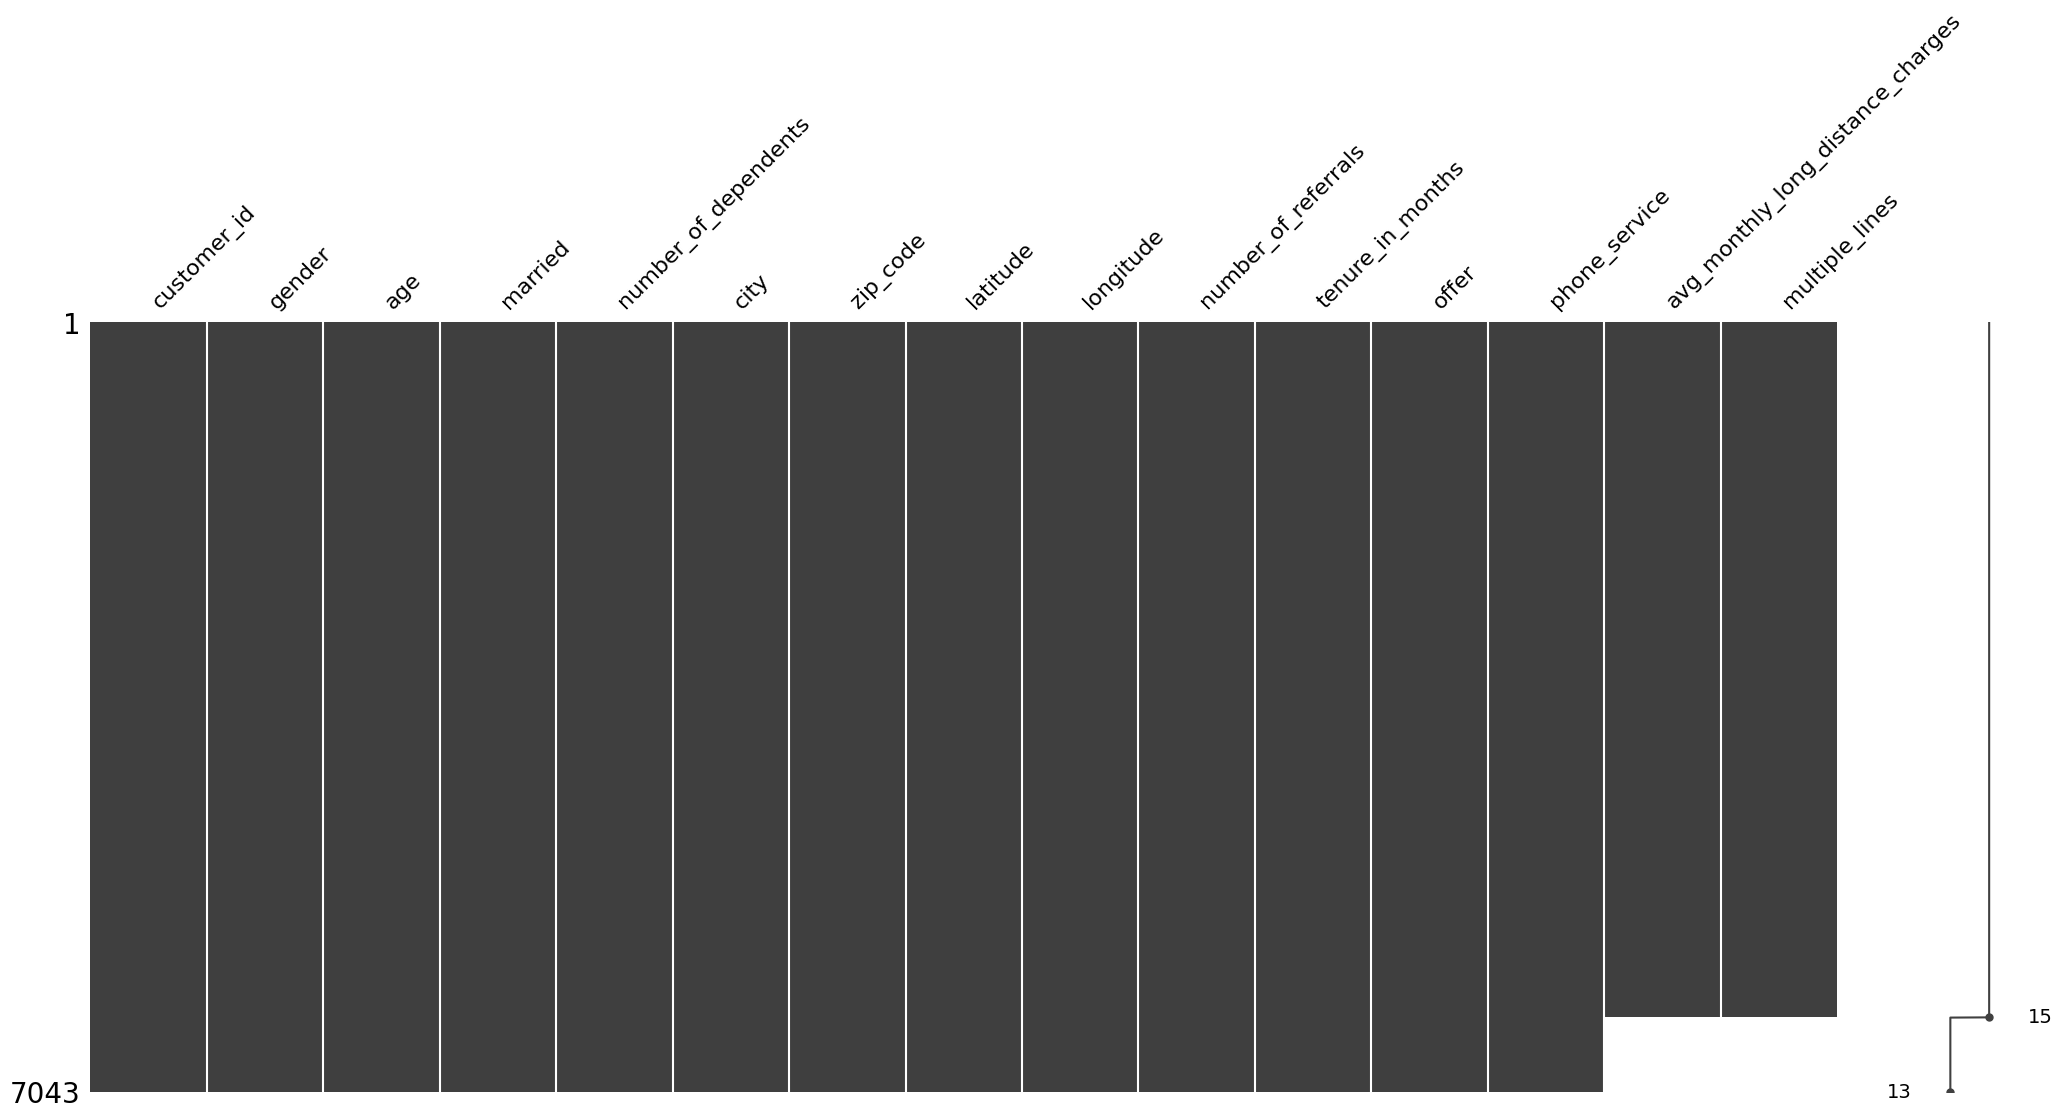

In [ ]:
### Examine NAs for these two variables ("Avg Monthly Long Distance Charges" & "Multiple Lines")
# Get only the columns from "Customer ID" to "Multiple Lines" and see the trends of NAs.

d_2 = d.iloc[:,0:15].sort_values(by = "multiple_lines")
msno.matrix(d_2)
plt.show() ## NAs for "Multiple Lines" = NAs for "Avg Monthly Long Distance Charges"

In [ ]:
# Check the relationship between these two variables above and "Phone Service"
d_2.loc[d_2["multiple_lines"].isna(), "phone_service": "multiple_lines"].groupby("phone_service").size()

# It was confirmed that NAs of multiple_lines = NAs of phone_service. there are only internet subscribers; hence, there is NA for phone realted variables.

phone_service
No    682
dtype: int64

### Handling NAs.

In [ ]:
## Phone related
# Fill na with "no_phone" for [multiple_lines].
d[["multiple_lines"]] = d[["multiple_lines"]].fillna("No")
d[["multiple_lines"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   multiple_lines  7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [ ]:
# Fill na with 0.0 for [avg_monthly_long_distance_charges]
d[["avg_monthly_long_distance_charges"]] = d[["avg_monthly_long_distance_charges"]].fillna(0.0)
d[["avg_monthly_long_distance_charges"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   avg_monthly_long_distance_charges  7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [ ]:
## Internet-related
# Fill na with 0 for [avg_monthly_gb_download]
d[["avg_monthly_gb_download"]] = d[["avg_monthly_gb_download"]].fillna(0.0)
d[["avg_monthly_gb_download"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_gb_download  7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [ ]:
# Fill na with "No" for other [9 variables].

# Only get object variables
col = d.iloc[:, [16] + list(range(18, 26))].columns

# Fill NAs
d[col] = d[col].fillna("No")
d[col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   internet_type           7043 non-null   object
 1   online_security         7043 non-null   object
 2   online_backup           7043 non-null   object
 3   device_protection_plan  7043 non-null   object
 4   premium_tech_support    7043 non-null   object
 5   streaming_tv            7043 non-null   object
 6   streaming_movies        7043 non-null   object
 7   streaming_music         7043 non-null   object
 8   unlimited_data          7043 non-null   object
dtypes: object(9)
memory usage: 495.3+ KB


In [ ]:
# Fill na with "no_churn" for 2 churners-related variables.

d[["churn_category", "churn_reason"]] = d[["churn_category", "churn_reason"]].fillna("no_churn")
d[["churn_category", "churn_reason"]] .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   churn_category  7043 non-null   object
 1   churn_reason    7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [ ]:
d.info() # No NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

## Outliers
### Conclusion: no further actionoutliers to be

In [ ]:
# Only get the numeric variables
numeric = d.select_dtypes(include = "number")
numeric.info()
numeric.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                7043 non-null   int64  
 1   number_of_dependents               7043 non-null   int64  
 2   zip_code                           7043 non-null   int64  
 3   latitude                           7043 non-null   float64
 4   longitude                          7043 non-null   float64
 5   number_of_referrals                7043 non-null   int64  
 6   tenure_in_months                   7043 non-null   int64  
 7   avg_monthly_long_distance_charges  7043 non-null   float64
 8   avg_monthly_gb_download            7043 non-null   float64
 9   monthly_charge                     7043 non-null   float64
 10  total_charges                      7043 non-null   float64
 11  total_refunds                      7043 non-null   float

Index(['age', 'number_of_dependents', 'zip_code', 'latitude', 'longitude',
       'number_of_referrals', 'tenure_in_months',
       'avg_monthly_long_distance_charges', 'avg_monthly_gb_download',
       'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue'],
      dtype='object')

Max:  80 
Min:  19
Higher whisker point: 102.0
Lower whisker point: -10.0


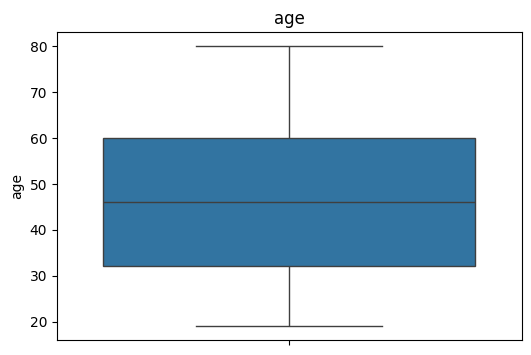

Max:  9 
Min:  0
Higher whisker point: 0.0
Lower whisker point: 0.0


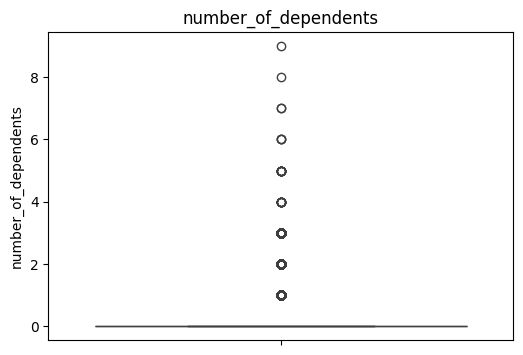

Max:  96150 
Min:  90001
Higher whisker point: 100171.0
Lower whisker point: 87259.0


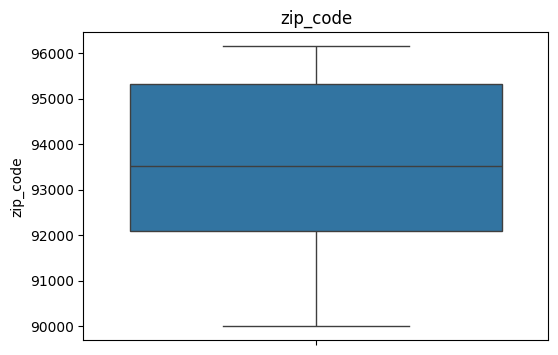

Max:  41.962127 
Min:  32.555828
Higher whisker point: 44.417333500000005
Lower whisker point: 27.734633499999994


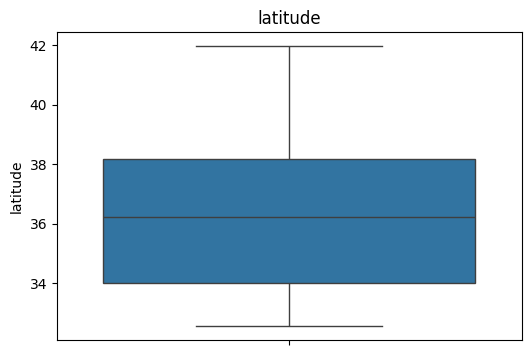

Max:  -114.192901 
Min:  -124.301372
Higher whisker point: -112.24235250000001
Lower whisker point: -127.51553249999998


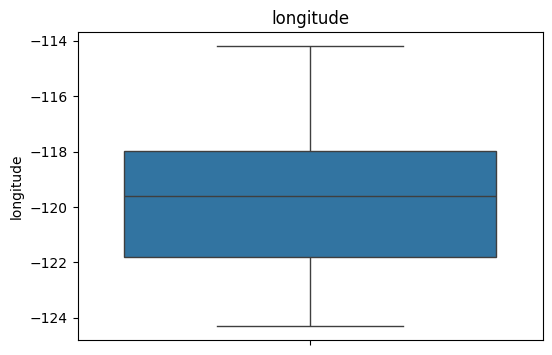

Max:  11 
Min:  0
Higher whisker point: 7.5
Lower whisker point: -4.5


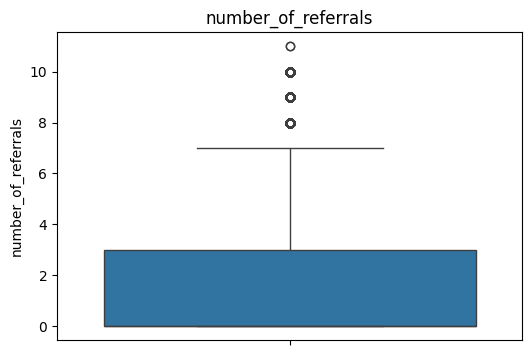

Max:  72 
Min:  1
Higher whisker point: 124.0
Lower whisker point: -60.0


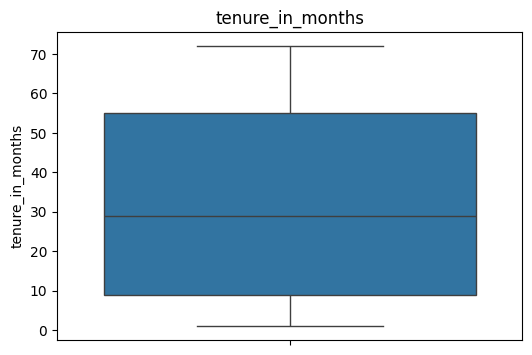

Max:  49.99 
Min:  0.0
Higher whisker point: 77.17249999999999
Lower whisker point: -31.56749999999999


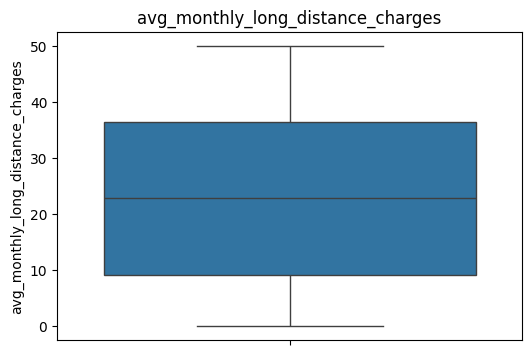

Max:  85.0 
Min:  0.0
Higher whisker point: 63.0
Lower whisker point: -33.0


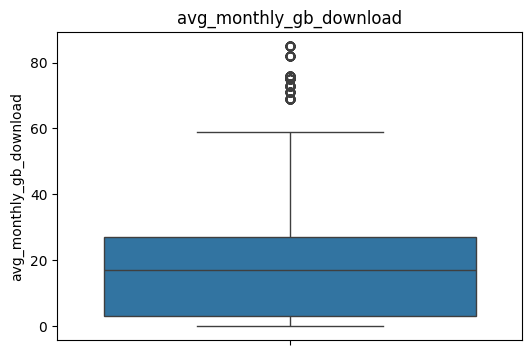

Max:  118.75 
Min:  -10.0
Higher whisker point: 178.775
Lower whisker point: -58.62500000000001


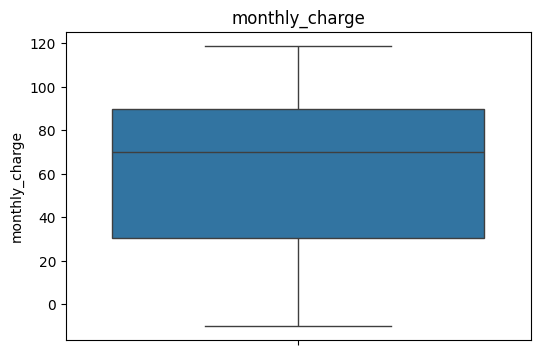

Max:  8684.8 
Min:  18.8
Higher whisker point: 8866.275
Lower whisker point: -4679.525


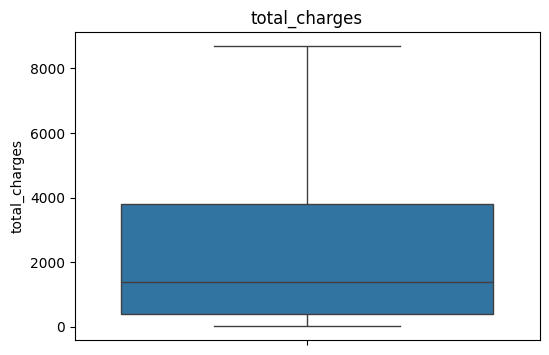

Max:  49.79 
Min:  0.0
Higher whisker point: 0.0
Lower whisker point: 0.0


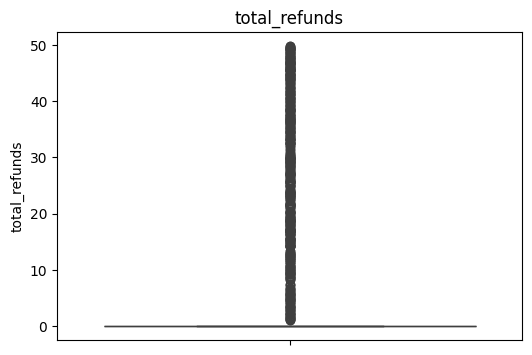

Max:  150 
Min:  0
Higher whisker point: 0.0
Lower whisker point: 0.0


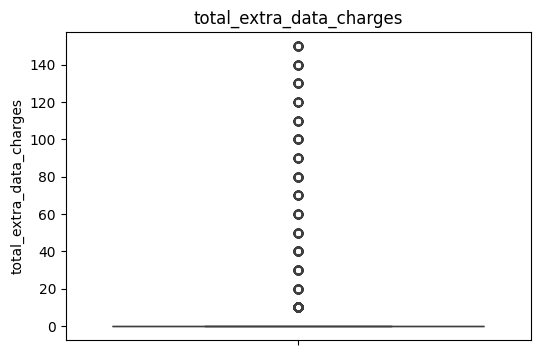

Max:  3564.72 
Min:  0.0
Higher whisker point: 2871.9325
Lower whisker point: -1610.2874999999997


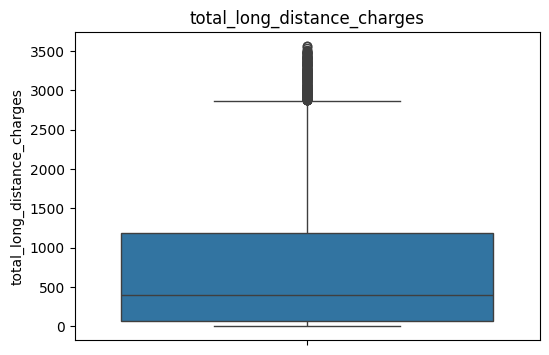

Max:  11979.34 
Min:  21.36
Higher whisker point: 11094.447500000002
Lower whisker point: -5687.692500000002


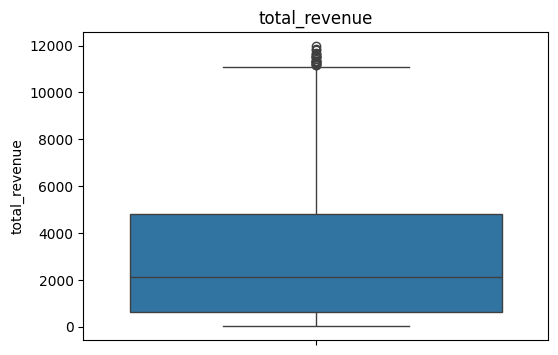

In [ ]:
 # Get the box plot of all 15 numeric variables
for col in numeric.columns:
  q1 = np.nanpercentile(d[col], 25)
  q3 = np.nanpercentile(d[col], 75)

  # Calculate the minimum and maximum points of the IQR
  iqr = q3 - q1
  lower_whisker = q1 - (iqr * 1.5)
  higher_whisker = q3 + (iqr * 1.5)

  print("Max: ", max(d[col]), "\nMin: ", min(d[col]))
  print("Higher whisker point:", higher_whisker)
  print("Lower whisker point:", lower_whisker)

  # Set the size of the plot
  plt.figure(figsize = (6, 4))

  sns.boxplot(d, y = col)
  plt.title(f"{col}")
  plt.show()

In [ ]:
#### There are outliers for the following 7 variables;
#### however, the values of outliers are possible for users to reach; hence, no further action will be taken.
#  1   number_of_dependents               7043 non-null   int64
#  5   number_of_referrals                7043 non-null   int64
#  8   avg_monthly_gb_download            5517 non-null   float64
#  11  total_refunds                      7043 non-null   float64
#  12  total_extra_data_charges           7043 non-null   int64
#  13  total_long_distance_charges        7043 non-null   float64
#  14  total_revenue                      7043 non-null   float64

## Merge

In [ ]:
# Merge customer table and zipcode table
all = pd.merge(d, z, how = "left", on = "zip_code")
all.info() #40 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   married                            7043 non-null   object 
 4   number_of_dependents               7043 non-null   int64  
 5   city                               7043 non-null   object 
 6   zip_code                           7043 non-null   int64  
 7   latitude                           7043 non-null   float64
 8   longitude                          7043 non-null   float64
 9   number_of_referrals                7043 non-null   int64  
 10  tenure_in_months                   7043 non-null   int64  
 11  offer                              7043 non-null   objec

In [ ]:
# Export csv file
os.getcwd()
all.to_csv("telecom_clean.csv", index = False)

# ------------------------------------ END 🤟